# Jonathan Halverson
# Tuesday, February 7, 2017
# Number of theaters a movie plays in versus time

Pandas is used to scrape the-numbers.com to plot the number of theaters a movie played versus time.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Create a list of dates in order to scrape:

In [2]:
#date_times = pd.date_range(end='2/3/2017', periods=13, freq='W-FRI')
date_times = pd.date_range(end='2/5/2017', periods=80, freq='D')
dates = [str(date_time.date()).replace('-', '/') for date_time in date_times]

In [3]:
movie_name = 'Manchester-by-the Sea'
#url_base = 'http://www.the-numbers.com/box-office-chart/weekend/'
url_base = 'http://www.the-numbers.com/box-office-chart/daily/'

For each date, extract the table and the appropriate data:

In [4]:
results = []
for date in dates:
    url = url_base + date
    dfs = pd.read_html(url, flavor='bs4', thousands=',')
    df = dfs[1]
    df.columns = df.iloc[0]
    df.drop(0, axis=0, inplace=True)
    df.columns = ['Rank', 'Prev. Rank'] + df.columns[2:].tolist()
    df.reset_index(drop=True, inplace=True)
    df = df.astype({'Thtrs.':int, 'Days':int})
    results.append([np.datetime64(date.replace('/', '-')), df[df.Movie == movie_name][['Thtrs.', 'Days']].values[0].tolist()])

Plot the data:

In [5]:
dates, thtrs_days = zip(*results)
thtrs, days = zip(*thtrs_days)

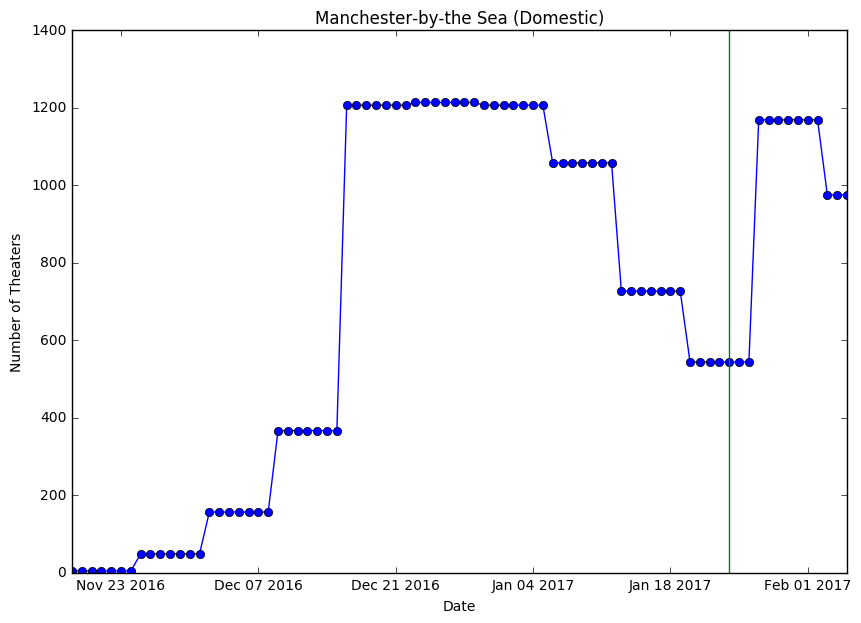

In [6]:
fig, ax = plt.subplots(figsize=(10, 7))
plt.plot(dates, thtrs, linestyle='-', marker='o')
plt.plot([np.datetime64('2017-01-24'), np.datetime64('2017-01-24')], [0, 1400])
plt.xlabel('Date')
plt.ylabel('Number of Theaters')
plt.title(movie_name + ' (Domestic)')

The vertical green line indicates when the Oscar nominations were announced. After the Best Picutre nomination the number of theaters was increased.